###Atharva Mankame [21BAI1780]

####Using SVM for digit recognition

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf

In [35]:
from keras.datasets import mnist
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [36]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

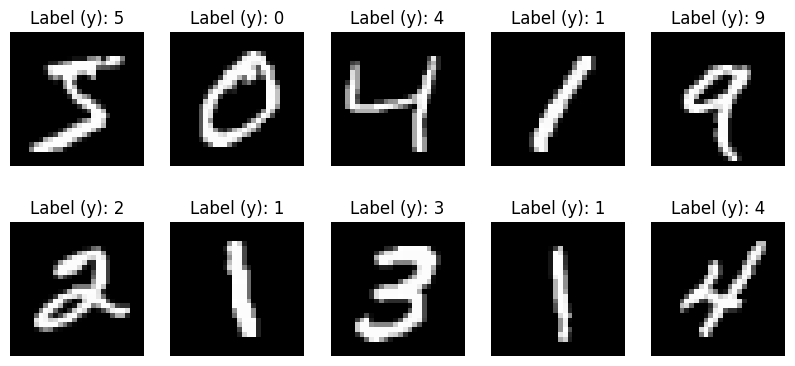

In [37]:
#plotting
fig = plt.figure(figsize=(10,7))
for i in range(10):
  ax = fig.add_subplot(3,5,i+1)
  ax.imshow(X_train[i], cmap=plt.get_cmap('gray'))
  ax.set_title('Label (y): {y}'.format(y=y_train[i]))
  plt.axis('off')

In [38]:
# reshaping to 784 from 28x28
X_train = X_train.reshape(X_train.shape[0], (28*28))
X_test = X_test.reshape(X_test.shape[0], (28*28))
# normalize
X_train = X_train/255
X_test = X_test/255

In [39]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [40]:
#train test split
X_train = X_train[0:10000,:]
y_train = y_train[0:10000]
X_test = X_test[0:2000,:]
y_test = y_test[0:2000]

In [41]:
pipe_1 = Pipeline([('scaler', MinMaxScaler()),("classifier", SVC(kernel='linear', C=1))])
pipe_1.fit(X_train, y_train.ravel())

acc = cross_val_score(pipe_1, X_train, y_train.ravel(), cv=2)
print(acc)

[0.915  0.9064]


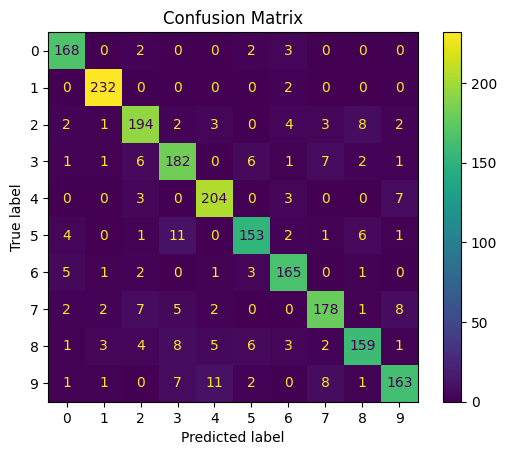

In [42]:
y_pred = pipe_1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [43]:
CR = classification_report(y_test, y_pred)
print(CR)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       175
           1       0.96      0.99      0.98       234
           2       0.89      0.89      0.89       219
           3       0.85      0.88      0.86       207
           4       0.90      0.94      0.92       217
           5       0.89      0.85      0.87       179
           6       0.90      0.93      0.91       178
           7       0.89      0.87      0.88       205
           8       0.89      0.83      0.86       192
           9       0.89      0.84      0.86       194

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



In [44]:
pipe_2 = Pipeline([('scaler', MinMaxScaler()),("classifier", SVC(kernel='rbf', gamma=0.1, C=1))])
pipe_2.fit(X_train, y_train.ravel())

acc = cross_val_score(pipe_2, X_train, y_train.ravel(), cv=2)
print(acc)

[0.834  0.8234]


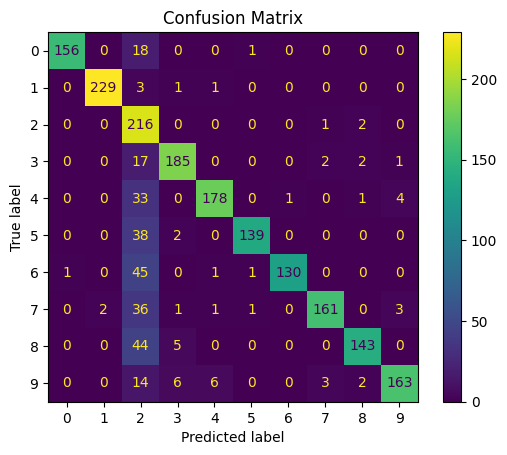

In [45]:
y_pred = pipe_2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [46]:
CR = classification_report(y_test, y_pred)
print(CR)

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       175
           1       0.99      0.98      0.98       234
           2       0.47      0.99      0.63       219
           3       0.93      0.89      0.91       207
           4       0.95      0.82      0.88       217
           5       0.98      0.78      0.87       179
           6       0.99      0.73      0.84       178
           7       0.96      0.79      0.87       205
           8       0.95      0.74      0.84       192
           9       0.95      0.84      0.89       194

    accuracy                           0.85      2000
   macro avg       0.92      0.84      0.86      2000
weighted avg       0.91      0.85      0.86      2000

